In [4]:
import numpy as np
import pandas as pd

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
print(pd.Series(d))

a    0.0
b    1.0
c    2.0
dtype: float64


In [6]:
print(pd.Series(d,index=['e','f','g','a','b']))

e    NaN
f    NaN
g    NaN
a    0.0
b    1.0
dtype: float64


In [7]:
print(d.get('a',123))

0.0


In [8]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [9]:
df=pd.DataFrame(d, index=['a','want','to','sleep','d'],columns=['two','sleep','pls'])
print(df)
print('col=',df.columns)
print('index=',df.index)

       two sleep  pls
a      1.0   NaN  NaN
want   NaN   NaN  NaN
to     NaN   NaN  NaN
sleep  NaN   NaN  NaN
d      4.0   NaN  NaN
col= Index(['two', 'sleep', 'pls'], dtype='object')
index= Index(['a', 'want', 'to', 'sleep', 'd'], dtype='object')


In [10]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [11]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [12]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),orient='index')

,0,1,2
A,1,2,3
B,4,5,6


In [13]:
df

,two,sleep,pls
a,1.0,NaN,NaN
want,NaN,NaN,NaN
to,NaN,NaN,NaN
sleep,NaN,NaN,NaN
d,4.0,NaN,NaN


In [14]:
df['two']

a        1.0
want     NaN
to       NaN
sleep    NaN
d        4.0
Name: two, dtype: float64

In [15]:
df['three']=df['two']*3/2
df

,two,sleep,pls,three
a,1.0,NaN,NaN,1.5
want,NaN,NaN,NaN,NaN
to,NaN,NaN,NaN,NaN
sleep,NaN,NaN,NaN,NaN
d,4.0,NaN,NaN,6.0


In [16]:
sleep=df.pop('pls')
print(sleep)
print(df)

a        NaN
want     NaN
to       NaN
sleep    NaN
d        NaN
Name: pls, dtype: object
       two sleep  three
a      1.0   NaN    1.5
want   NaN   NaN    NaN
to     NaN   NaN    NaN
sleep  NaN   NaN    NaN
d      4.0   NaN    6.0


In [17]:
df['newcol']='repeated value'
df

,two,sleep,three,newcol
a,1.0,NaN,1.5,repeated value
want,NaN,NaN,NaN,repeated value
to,NaN,NaN,NaN,repeated value
sleep,NaN,NaN,NaN,repeated value
d,4.0,NaN,6.0,repeated value


In [18]:
df['copy a few']=df['two'][2:5]
df

,two,sleep,three,newcol,copy a few
a,1.0,NaN,1.5,repeated value,NaN
want,NaN,NaN,NaN,repeated value,NaN
to,NaN,NaN,NaN,repeated value,NaN
sleep,NaN,NaN,NaN,repeated value,NaN
d,4.0,NaN,6.0,repeated value,4.0


In [19]:
#df.insert(loc, column, value, allow_duplicates=False)
df.insert(2,'four','new')
df

,two,sleep,four,three,newcol,copy a few
a,1.0,NaN,new,1.5,repeated value,NaN
want,NaN,NaN,new,NaN,repeated value,NaN
to,NaN,NaN,new,NaN,repeated value,NaN
sleep,NaN,NaN,new,NaN,repeated value,NaN
d,4.0,NaN,new,6.0,repeated value,4.0


In [20]:
df.assign(name=df['newcol']+df['four'])

,two,sleep,four,three,newcol,copy a few,name
a,1.0,NaN,new,1.5,repeated value,NaN,repeated valuenew
want,NaN,NaN,new,NaN,repeated value,NaN,repeated valuenew
to,NaN,NaN,new,NaN,repeated value,NaN,repeated valuenew
sleep,NaN,NaN,new,NaN,repeated value,NaN,repeated valuenew
d,4.0,NaN,new,6.0,repeated value,4.0,repeated valuenew


In [21]:
#Select column	df[col] 	Series
#Select row by label	df.loc[label]	Series
#Select row by integer location	df.iloc[loc]	Series
#Slice rows	df[5:10]	DataFrame
#Select rows by boolean vector	df[bool_vec]	DataFrame

In [22]:
#data alignment
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'E', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
#only columns/rows in union will show up
df3=df+df2
print(df3)

          A         B   C   D   E
0 -0.062039 -0.608705 NaN NaN NaN
1 -0.730968 -0.796905 NaN NaN NaN
2 -0.068856 -0.162355 NaN NaN NaN
3 -0.740586 -1.226934 NaN NaN NaN
4  0.007931  3.305400 NaN NaN NaN
5  1.657552 -0.615898 NaN NaN NaN
6  0.299147 -2.525684 NaN NaN NaN
7       NaN       NaN NaN NaN NaN
8       NaN       NaN NaN NaN NaN
9       NaN       NaN NaN NaN NaN


In [23]:
df3.index=['g','h','i','j','k','l','m','u','i','o']
print(df3.iloc[5])
print(df3.loc['l'])

A    1.657552
B   -0.615898
C         NaN
D         NaN
E         NaN
Name: l, dtype: float64
A    1.657552
B   -0.615898
C         NaN
D         NaN
E         NaN
Name: l, dtype: float64


In [24]:
df3-df3.iloc[1]

,A,B,C,D,E
g,0.668929,0.188200,NaN,NaN,NaN
h,0.000000,0.000000,NaN,NaN,NaN
i,0.662111,0.634550,NaN,NaN,NaN
j,-0.009618,-0.430029,NaN,NaN,NaN
k,0.738899,4.102304,NaN,NaN,NaN
l,2.388520,0.181007,NaN,NaN,NaN
m,1.030115,-1.728779,NaN,NaN,NaN
u,NaN,NaN,NaN,NaN,NaN
i,NaN,NaN,NaN,NaN,NaN
o,NaN,NaN,NaN,NaN,NaN


In [25]:
index = pd.date_range('1/1/2000', periods=8)
df=pd.DataFrame(np.random.randn(8,3),index=index,columns=list('ABC'))
df

,A,B,C
2000-01-01,-0.286165,0.780916,-0.223788
2000-01-02,1.586706,-0.916788,0.382002
2000-01-03,-0.023233,0.735224,0.524257
2000-01-04,0.224063,-0.544140,2.154098
2000-01-05,-0.726829,-0.963282,-0.002180
2000-01-06,0.331382,-0.056635,0.971911
2000-01-07,-0.556772,0.916878,0.340193
2000-01-08,0.370355,-0.188539,-0.724874


In [26]:
df-df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.sub(df['A'], axis=0)

,A,B,C
2000-01-01,0.0,1.067081,0.062377
2000-01-02,0.0,-2.503494,-1.204703
2000-01-03,0.0,0.758457,0.547490
2000-01-04,0.0,-0.768204,1.930035
2000-01-05,0.0,-0.236453,0.724649
2000-01-06,0.0,-0.388017,0.640530
2000-01-07,0.0,1.473650,0.896965
2000-01-08,0.0,-0.558894,-1.095229


In [28]:
df*5

,A,B,C
2000-01-01,-1.430826,3.904581,-1.118942
2000-01-02,7.933528,-4.583941,1.910012
2000-01-03,-0.116165,3.676119,2.621286
2000-01-04,1.120316,-2.720702,10.770491
2000-01-05,-3.634144,-4.816410,-0.010898
2000-01-06,1.656908,-0.283176,4.859557
2000-01-07,-2.783861,4.584388,1.700965
2000-01-08,1.851775,-0.942693,-3.624371


In [29]:
df1 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] })
df2 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] })
df1==df2

,a,b
0,False,False
1,False,True
2,True,False


In [30]:
df1 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] },dtype=bool)
df1 #1=true,0=false

,a,b
0,True,False
1,False,True
2,True,True


In [31]:
df.T
#.T transposes(swap x and y axis)

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00
A,-0.286165,1.586706,-0.023233,0.224063,-0.726829,0.331382,-0.556772,0.370355
B,0.780916,-0.916788,0.735224,-0.544140,-0.963282,-0.056635,0.916878,-0.188539
C,-0.223788,0.382002,0.524257,2.154098,-0.002180,0.971911,0.340193,-0.724874


In [32]:
np.exp(df)

,A,B,C
2000-01-01,0.751139,2.183472,0.799484
2000-01-02,4.887621,0.399801,1.465216
2000-01-03,0.977035,2.085949,1.689203
2000-01-04,1.251150,0.580340,8.620113
2000-01-05,0.483440,0.381638,0.997823
2000-01-06,1.392891,0.944939,2.642992
2000-01-07,0.573056,2.501468,1.405219
2000-01-08,1.448249,0.828168,0.484385


In [33]:
np.asarray(df)

array([[-0.28616516,  0.78091613, -0.22378841],
       [ 1.58670559, -0.91678829,  0.38200249],
       [-0.02323299,  0.73522383,  0.5242571 ],
       [ 0.22406314, -0.54414046,  2.15409818],
       [-0.7268287 , -0.96328202, -0.0021795 ],
       [ 0.33138164, -0.05663515,  0.97191146],
       [-0.55677228,  0.91687758,  0.34019298],
       [ 0.37035506, -0.18853867, -0.7248743 ]])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2000-01-01 to 2000-01-08
Freq: D
Data columns (total 3 columns):
A    8 non-null float64
B    8 non-null float64
C    8 non-null float64
dtypes: float64(3)
memory usage: 576.0 bytes


In [40]:
air=pd.read_csv('airbnb_data.csv')
air

,listing_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,1133718,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,9,4.5,12,1.0,NaN,74.0,NaN,2017-05-17 09:10:25.431659,1.293354,103.769226,0101000020E6100000E84EB0FF3AF159409C69C2F693B1...
1,3179080,1280,15295886,Shared room,NaN,Singapore,NaN,TS17,15,5.0,12,1.0,NaN,77.0,NaN,2017-05-17 09:10:24.216548,1.310862,103.858828,0101000020E6100000E738B709F7F659403F1BB96E4AF9...
2,15303457,1280,97053568,Shared room,NaN,Singapore,NaN,MK05,0,0.0,14,1.0,NaN,60.0,NaN,2017-05-17 09:10:16.969900,1.333744,103.764612,0101000020E610000044882B67EFF0594093C7D3F20357...
3,13902389,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,0,0.0,12,1.0,NaN,30.0,NaN,2017-05-17 09:10:15.196321,1.294119,103.769178,0101000020E61000005FB35C363AF15940971DE21FB6B4...
4,13902391,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,1,0.0,12,1.0,NaN,30.0,NaN,2017-05-17 09:10:15.170457,1.292766,103.768432,0101000020E6100000CB4C69FD2DF159407F17B6662BAF...
5,13523873,1280,51507525,Shared room,NaN,Singapore,NaN,MK29,0,0.0,3,1.0,NaN,14.0,NaN,2017-05-17 09:10:15.160798,1.353842,103.945090,0101000020E6100000B471C45A7CFC59403F389F3A56A9...
6,13916549,1280,81373064,Shared room,NaN,Singapore,NaN,TS07,1,0.0,4,1.0,NaN,64.0,NaN,2017-05-17 09:10:03.535733,1.288610,103.848624,0101000020E610000072A609DB4FF65940E7C6F484259E...
7,10001615,1280,50960671,Shared room,NaN,Singapore,NaN,TS04,31,4.5,16,1.0,NaN,78.0,NaN,2017-05-17 09:10:03.528785,1.286715,103.848313,0101000020E610000063F19BC24AF65940BC5CC4776296...
8,12525278,1280,17526618,Shared room,NaN,Singapore,NaN,TS06,3,4.5,16,1.0,NaN,43.0,NaN,2017-05-17 09:10:01.119889,1.282925,103.845295,0101000020E61000003A1E335019F659406688635DDC86...
9,13274598,1280,17526618,Shared room,NaN,Singapore,NaN,TS06,3,4.0,16,1.0,NaN,43.0,NaN,2017-05-17 09:10:01.116458,1.282875,103.845403,0101000020E61000002E3C2F151BF659402DB29DEFA786...


In [42]:
air['bedrooms']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
7182    1.0
7183    1.0
7184    1.0
7185    1.0
7186    1.0
7187    1.0
7188    1.0
7189    1.0
7190    1.0
7191    1.0
7192    1.0
7193    1.0
7194    1.0
7195    1.0
7196    1.0
7197    1.0
7198    1.0
7199    1.0
7200    1.0
7201    1.0
7202    1.0
7203    1.0
7204    1.0
7205    1.0
7206    1.0
7207    1.0
7208    1.0
7209    1.0
7210    1.0
7211    1.0
Name: bedrooms, Length: 7212, dtype: float64

In [44]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 19 columns):
listing_id              7212 non-null int64
survey_id               7212 non-null int64
host_id                 7212 non-null int64
room_type               7212 non-null object
country                 0 non-null float64
city                    7212 non-null object
borough                 0 non-null float64
neighborhood            7212 non-null object
reviews                 7212 non-null int64
overall_satisfaction    7212 non-null float64
accommodates            7212 non-null int64
bedrooms                7212 non-null float64
bathrooms               0 non-null float64
price                   7212 non-null float64
minstay                 0 non-null float64
last_modified           7212 non-null object
latitude                7212 non-null float64
longitude               7212 non-null float64
location                7212 non-null object
dtypes: float64(9), int64(5), object(5)
memory

In [48]:
print(air.iloc[3:1000:10].to_string())

     listing_id  survey_id    host_id        room_type  country       city  borough neighborhood  reviews  overall_satisfaction  accommodates  bedrooms  bathrooms  price  minstay               last_modified  latitude   longitude                                           location
3      13902389       1280    6219420      Shared room      NaN  Singapore      NaN         MK03        0                   0.0            12       1.0        NaN   30.0      NaN  2017-05-17 09:10:15.196321  1.294119  103.769178  0101000020E61000005FB35C363AF15940971DE21FB6B4...
13     11646465       1280   61762641      Shared room      NaN  Singapore      NaN         TS06        1                   0.0             6       1.0        NaN   60.0      NaN  2017-05-17 09:09:57.315328  1.282634  103.844337  0101000020E610000060730E9E09F6594079CDAB3AAB85...
23     16419202       1280  107615826      Shared room      NaN  Singapore      NaN         TS12        2                   0.0             2       1.0        N

In [64]:
pd.set_option('display.width',100) #default is 80
print(air[:4])

   listing_id  survey_id   host_id    room_type  country       city  borough neighborhood  \
0     1133718       1280   6219420  Shared room      NaN  Singapore      NaN         MK03   
1     3179080       1280  15295886  Shared room      NaN  Singapore      NaN         TS17   
2    15303457       1280  97053568  Shared room      NaN  Singapore      NaN         MK05   
3    13902389       1280   6219420  Shared room      NaN  Singapore      NaN         MK03   

   reviews  overall_satisfaction  accommodates  bedrooms  bathrooms  price  minstay  \
0        9                  4.5             12       1.0        NaN   74.0      NaN   
1       15                  5.0             12       1.0        NaN   77.0      NaN   
2        0                  0.0             14       1.0        NaN   60.0      NaN   
3        0                  0.0             12       1.0        NaN   30.0      NaN   

         last_modified  latitude   longitude             location  
0  2017-05-17 09:10...  1.2933

In [68]:
#pd.set_option('display.max_colwidth',20)
air[:3]

,listing_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,1133718,1280,6219420,Shared room,NaN,Singapore,NaN,MK03,9,4.5,12,1.0,NaN,74.0,NaN,2017-05-17 09:10...,1.293354,103.769226,0101000020E61000...
1,3179080,1280,15295886,Shared room,NaN,Singapore,NaN,TS17,15,5.0,12,1.0,NaN,77.0,NaN,2017-05-17 09:10...,1.310862,103.858828,0101000020E61000...
2,15303457,1280,97053568,Shared room,NaN,Singapore,NaN,MK05,0,0.0,14,1.0,NaN,60.0,NaN,2017-05-17 09:10...,1.333744,103.764612,0101000020E61000...


In [69]:
#If a DataFrame column label is a valid Python variable name,
#the column can be accessed like an attribute:

df.A

2000-01-01   -0.286165
2000-01-02    1.586706
2000-01-03   -0.023233
2000-01-04    0.224063
2000-01-05   -0.726829
2000-01-06    0.331382
2000-01-07   -0.556772
2000-01-08    0.370355
Freq: D, Name: A, dtype: float64

In [70]:
3ddata = {'Item1' : pd.DataFrame(np.random.randn(4, 3)),
'Item2' : pd.DataFrame(np.random.randn(4, 2))}
3ddata

{'Item1':           0         1         2
 0 -1.304214 -0.089381  0.098794
 1 -0.777887 -0.634836  1.591970
 2  1.472397 -1.663792  1.116846
 3 -1.604787 -0.886682  0.070012, 'Item2':           0         1
 0  0.033341 -0.503275
 1 -0.638264  0.715367
 2  0.850807 -0.199752
 3 -0.991398 -1.586370}

In [75]:
print(df)

                   A         B         C
2000-01-01 -0.286165  0.780916 -0.223788
2000-01-02  1.586706 -0.916788  0.382002
2000-01-03 -0.023233  0.735224  0.524257
2000-01-04  0.224063 -0.544140  2.154098
2000-01-05 -0.726829 -0.963282 -0.002180
2000-01-06  0.331382 -0.056635  0.971911
2000-01-07 -0.556772  0.916878  0.340193
2000-01-08  0.370355 -0.188539 -0.724874


In [87]:
ser=df['A']
ser[5]

0.3313816391987868

In [90]:
#swapping column positions
df[['B', 'A']] = df[['A', 'B']]
df

,A,B,C
dates,,,
2000-01-01,0.780916,-0.286165,-0.223788
2000-01-02,-0.916788,1.586706,0.382002
2000-01-03,0.735224,-0.023233,0.524257
2000-01-04,-0.544140,0.224063,2.154098
2000-01-05,-0.963282,-0.726829,-0.002180
2000-01-06,-0.056635,0.331382,0.971911
2000-01-07,0.916878,-0.556772,0.340193
2000-01-08,-0.188539,0.370355,-0.724874


In [92]:
print(df[::2])

                   A         B         C
dates                                   
2000-01-01  0.780916 -0.286165 -0.223788
2000-01-03  0.735224 -0.023233  0.524257
2000-01-05 -0.963282 -0.726829 -0.002180
2000-01-07  0.916878 -0.556772  0.340193


In [94]:
df1=df.copy()
df1

,A,B,C
dates,,,
2000-01-01,0.780916,-0.286165,-0.223788
2000-01-02,-0.916788,1.586706,0.382002
2000-01-03,0.735224,-0.023233,0.524257
2000-01-04,-0.544140,0.224063,2.154098
2000-01-05,-0.963282,-0.726829,-0.002180
2000-01-06,-0.056635,0.331382,0.971911
2000-01-07,0.916878,-0.556772,0.340193
2000-01-08,-0.188539,0.370355,-0.724874


In [100]:
df[lambda x:x>0]

,A,B,C
dates,,,
2000-01-01,0.780916,NaN,NaN
2000-01-02,NaN,1.586706,0.382002
2000-01-03,0.735224,NaN,0.524257
2000-01-04,NaN,0.224063,2.154098
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,0.331382,0.971911
2000-01-07,0.916878,NaN,0.340193
2000-01-08,NaN,0.370355,NaN


In [108]:
#selects random rows from dataframe
print(df.sample(3))
print(df.sample(frac=0.6))

                   A         B         C
dates                                   
2000-01-08 -0.188539  0.370355 -0.724874
2000-01-03  0.735224 -0.023233  0.524257
2000-01-01  0.780916 -0.286165 -0.223788
                   A         B         C
dates                                   
2000-01-06 -0.056635  0.331382  0.971911
2000-01-08 -0.188539  0.370355 -0.724874
2000-01-03  0.735224 -0.023233  0.524257
2000-01-04 -0.544140  0.224063  2.154098
2000-01-07  0.916878 -0.556772  0.340193


In [112]:
df.sample(6,replace=True)
#replace=True allows values to repeat

,A,B,C
dates,,,
2000-01-01,0.780916,-0.286165,-0.223788
2000-01-08,-0.188539,0.370355,-0.724874
2000-01-02,-0.916788,1.586706,0.382002
2000-01-02,-0.916788,1.586706,0.382002
2000-01-05,-0.963282,-0.726829,-0.002180
2000-01-02,-0.916788,1.586706,0.382002


In [119]:
#changing weightage of sample rows
ex_weights=[0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.1]#must add up to 1, else will be renormalised to 1
#weights express the chance of the row being chosen
#weights can be take from a column in dataframe
df['B']=abs(df['B'])
df.sample(3,weights='B')

,A,B,C
dates,,,
2000-01-08,-0.188539,0.370355,-0.724874
2000-01-02,-0.916788,1.586706,0.382002
2000-01-05,-0.963282,0.726829,-0.002180


In [123]:
df.sample(2,axis=1,random_state=2) 
#samples columns instead
#random_state gives the randomness as seed

,C,B
dates,,
2000-01-01,-0.223788,0.286165
2000-01-02,0.382002,1.586706
2000-01-03,0.524257,0.023233
2000-01-04,2.154098,0.224063
2000-01-05,-0.002180,0.726829
2000-01-06,0.971911,0.331382
2000-01-07,0.340193,0.556772
2000-01-08,-0.724874,0.370355


In [128]:
print(np.arange(7))

[0 1 2 3 4 5 6]


In [130]:
df.columns=['test','out','pd']

In [155]:
df

,test,out,pd,new,newcol
dates,,,,,
2000-01-01,0.780916,0.286165,-0.223788,0.511229,0.413022
2000-01-02,-0.916788,1.586706,0.382002,0.579610,0.770956
2000-01-03,0.735224,0.023233,0.524257,0.675499,0.236978
2000-01-04,-0.544140,0.224063,2.154098,0.350782,0.814703
2000-01-05,-0.963282,0.726829,-0.002180,0.319431,0.585613
2000-01-06,-0.056635,0.331382,0.971911,0.358566,0.277238
2000-01-07,0.916878,0.556772,0.340193,0.897318,0.791031
2000-01-08,-0.188539,0.370355,-0.724874,0.915809,0.226542


In [157]:
#appending rows/cols
df['newcol']=np.random.rand(8)
df

,test,out,pd,new,newcol
dates,,,,,
2000-01-01,0.780916,0.286165,-0.223788,0.511229,0.375733
2000-01-02,-0.916788,1.586706,0.382002,0.579610,0.977074
2000-01-03,0.735224,0.023233,0.524257,0.675499,0.723295
2000-01-04,-0.544140,0.224063,2.154098,0.350782,0.271908
2000-01-05,-0.963282,0.726829,-0.002180,0.319431,0.135626
2000-01-06,-0.056635,0.331382,0.971911,0.358566,0.777282
2000-01-07,0.916878,0.556772,0.340193,0.897318,0.158530
2000-01-08,-0.188539,0.370355,-0.724874,0.915809,0.542256


In [1]:
df

NameError: name 'df' is not defined

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

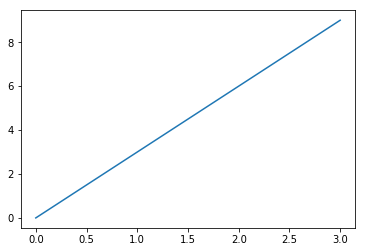

In [6]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot 

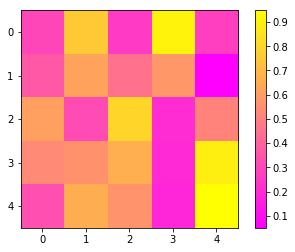

In [12]:
image=np.random.rand(5,5)
plt.imshow(image, cmap=plt.cm.spring)
plt.colorbar()

In [34]:
arr=np.arange(1,16)
newarr=arr.reshape(3,5).T.ravel().reshape(5,3)[1::2]
newarr

array([[ 2,  7, 12],
       [ 4,  9, 14]])

In [38]:
import numpy as np
a = np.arange(25).reshape(5, 5)
b = np.array([1., 5, 10, 15, 20])
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])